## Image Recognition: VGG16 et ImageNet

**Objectif**: Classification d'une image par un algorithme de tranfert learning

<img src = "cat.3.jpg" width = "400">

**Question**: A quel type de chat appartient ce chat?

Le code Python ci-dessous nous aide à répondre à la question.

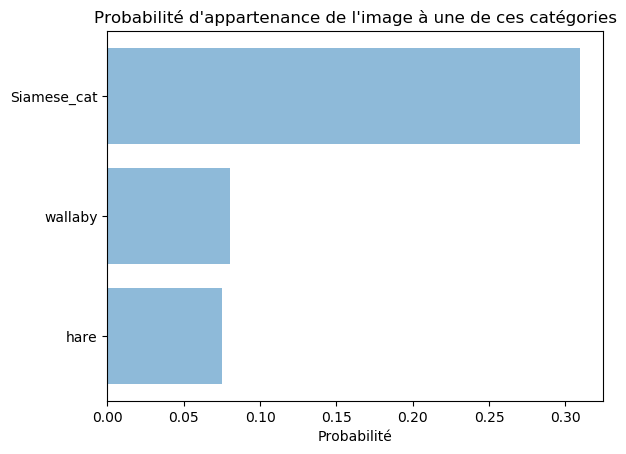

('Top 3 :', [('n02123597', 'Siamese_cat', 0.30934158), ('n01877812', 'wallaby', 0.080341235), ('n02326432', 'hare', 0.07509846)])


In [5]:
#### Fonction de Synthèse de l'ensemble des calculs

#### VGG16 préentrainé

#### Importation des librairies de deep learning
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
#### Importation de la fonction decode_predictions
from keras.applications.vgg16 import decode_predictions
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#### Définition de la fonction d'identification du type de l'image

def prediction_image(image):
    """
        Donne les trois probabiltés d'appartenance d'une image
        Entrée:
            image.format
        Sortie:
            Liste de j éléments: id de l'objet identifié, le type de l'objet identifié, la probabilité d'appartence de l'mage avec l'objet
            Graphique des j élements et de leur probabilités
    
    """
    ### On lance le modèle VGG16 (Initialisation)
    model = VGG16() # Création du modèle VGG-16 implementé par Keras

    #### Chargement de l'image
    img = load_img(image, target_size=(224, 224))  # Charger l'image
    img = img_to_array(img)  # Convertir en tableau numpy
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  # Créer la collection d'images (un seul échantillon)
    img = preprocess_input(img)  # Prétraiter l'image comme le veut VGG-16
    y = model.predict(img)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)
    
    j = 3 ##### On prend les j élément de la liste (Ici 3)
    a = 'Top '+str(j)+" :", decode_predictions(y, top=j)[0] #### Affiche les j classes les plus probables (Ici 3)
    a 
    #### Extraction des valeurs des types de l'image etdes probabilités asociées.
    x = []
    y = []
    
    ##### Création de deux listes à parir du tuple: la premiere est le nom de la catégorie, la seconde la probabilité.
    
    for i in range(j):
        y.append(a[1][i][1]) #### Extraction de la catégorie : liste x
        x.append(a[1][i][2]) #### Extraction de la probabilité d'appartenance à la catégorie : liste y
    

    #### ! Ordre: ordonnée,abscisses (bar plot horizontale)
    plt.barh(y, x, align='center', alpha=0.5)
    plt.yticks(y, y) #### Ordonnée y : taille
    plt.xlabel('Probabilité')
    plt.title('Probabilité d\'appartenance de l\'image à une de ces catégories')
    plt.gca().invert_yaxis()#### On inverse l'axe des ordonnées du barplot horizontale

    plt.show()
    print(a) 
    
    
    
b = prediction_image("cat.3.jpg")
b #### YYYYYYYYYY!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Il y a donc 30% de chance qu'il s'agissent d'un chat **siamois**.